In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy, random

(100,)


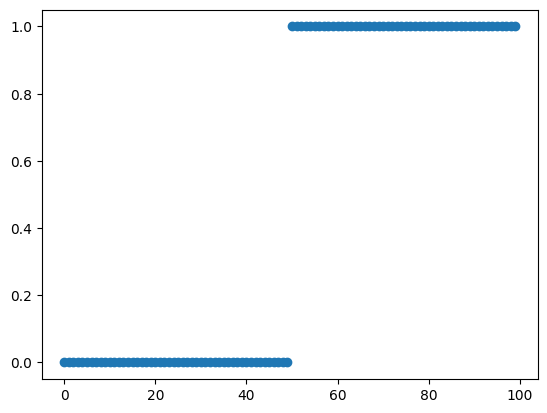

In [37]:
x = np.array([(x) for x in range(0, 100)])
print(y.shape)
y = np.concatenate((np.zeros(50), np.ones(50)))
plt.scatter(x, y)
plt.show()

In [56]:
# x -> (m x n) matrix
# x[i] -> a single row of the matrix with all the features in a vector
# y -> (n) array of n elements which are actual results
# y[i] -> result of each row
# w -> vector of m dimension
# w[i] -> feature weight of each feature 

def compute_cost(x, y, w, b):
    m = x.shape[0] # number of rows
    cost = 0.0

    for i in range(m):
        f_wb = 1/(1+(np.exp(-1*(np.dot(x[i], w)+ b))))
        cost += (-y[i]*(np.log(f_wb)))-(1-y[i])*(math.log(1-f_wb))
    
    return cost/m

import numpy as np




In [57]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

In [58]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


In [64]:
def compute_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb = 1/(1+(np.exp(-1*(np.dot(x[i], w)+ b))))

        for j in range(n):
            dj_dw[j] = (f_wb - y[i])*x[i,j]
            
        dj_db += (f_wb - y[i])
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_dw

In [65]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(x, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(x, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [66]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

TypeError: only length-1 arrays can be converted to Python scalars